# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-05-28 17:48:31.987555: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 17:48:31.995356: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 17:48:32.109716: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 17:48:34.689208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
####tma.clear_directory()

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

'Clear Directory'

In [4]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="seeds.csv", split = "random", percent_of_anchors = [0.15], random_state=342, verbose = 2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
test.run_MAGAN_tests()


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (199, 1)
Split B Features shape (199, 6)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

-------------------------------------   MAGAN TESTS  /seeds  -------------------------------------

FOSCTTM: 0.0002903967071538598
Cross Embedding: 0.8492462311557789


True

In [4]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

2024-05-28 12:41:15.721152: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 12:41:15.728051: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 12:41:15.741614: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 12:41:15.742965: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 12:41:15.747975: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 12:41:15.750388: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-28 12:41:15.755819: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not b

In [8]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [6]:
df.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
185734,diabetes,SPUD,8283,turn,66.0,0.09,0.15,NaN,NaN,average,distance,0.050240,0.794271,0.744030
228151,ecoli_5,SPUD,4898,skewed,30.0,0.09,0.05,NaN,NaN,average,distance,0.326759,0.623853,0.297094
381282,crx,SPUD,3347,distort,72.0,0.11,0.20,NaN,NaN,average,pure,0.168956,0.798193,0.629237
218017,segmentation,DTA,4822,turn,22.0,0.09,0.30,NaN,NaN,NaN,NaN,0.010256,0.901460,0.891204
461264,Cancer_Data,DIG,7493,random,86.0,0.15,0.50,None,0.080337,NaN,NaN,0.056548,0.959578,0.903030


In [7]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 635064


 Method        Lengths
--------      ----------
 MAGAN:          1336
 SSMA:          57260
 DTA:          57270
 Nama:          5728
 SPUD:          336850
 DIG:          176620


----------------------       Splits      ----------------------
Total data of random: 144191

 random        Lengths
--------      ----------
 MAGAN:          270
 SSMA:          14220
 DTA:          14220
 Nama:          1421
 SPUD:          68690
 DIG:          45370


Total data of even: 69740

 even        Lengths
--------      ----------
 MAGAN:          285
 SSMA:          5230
 DTA:          5240
 Nama:          525
 SPUD:          31340
 DIG:          27120


Total data of skewed: 152071

 skewed        Lengths
--------      ----------
 MAGAN:          261
 SSMA:          12100
 DTA:   

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

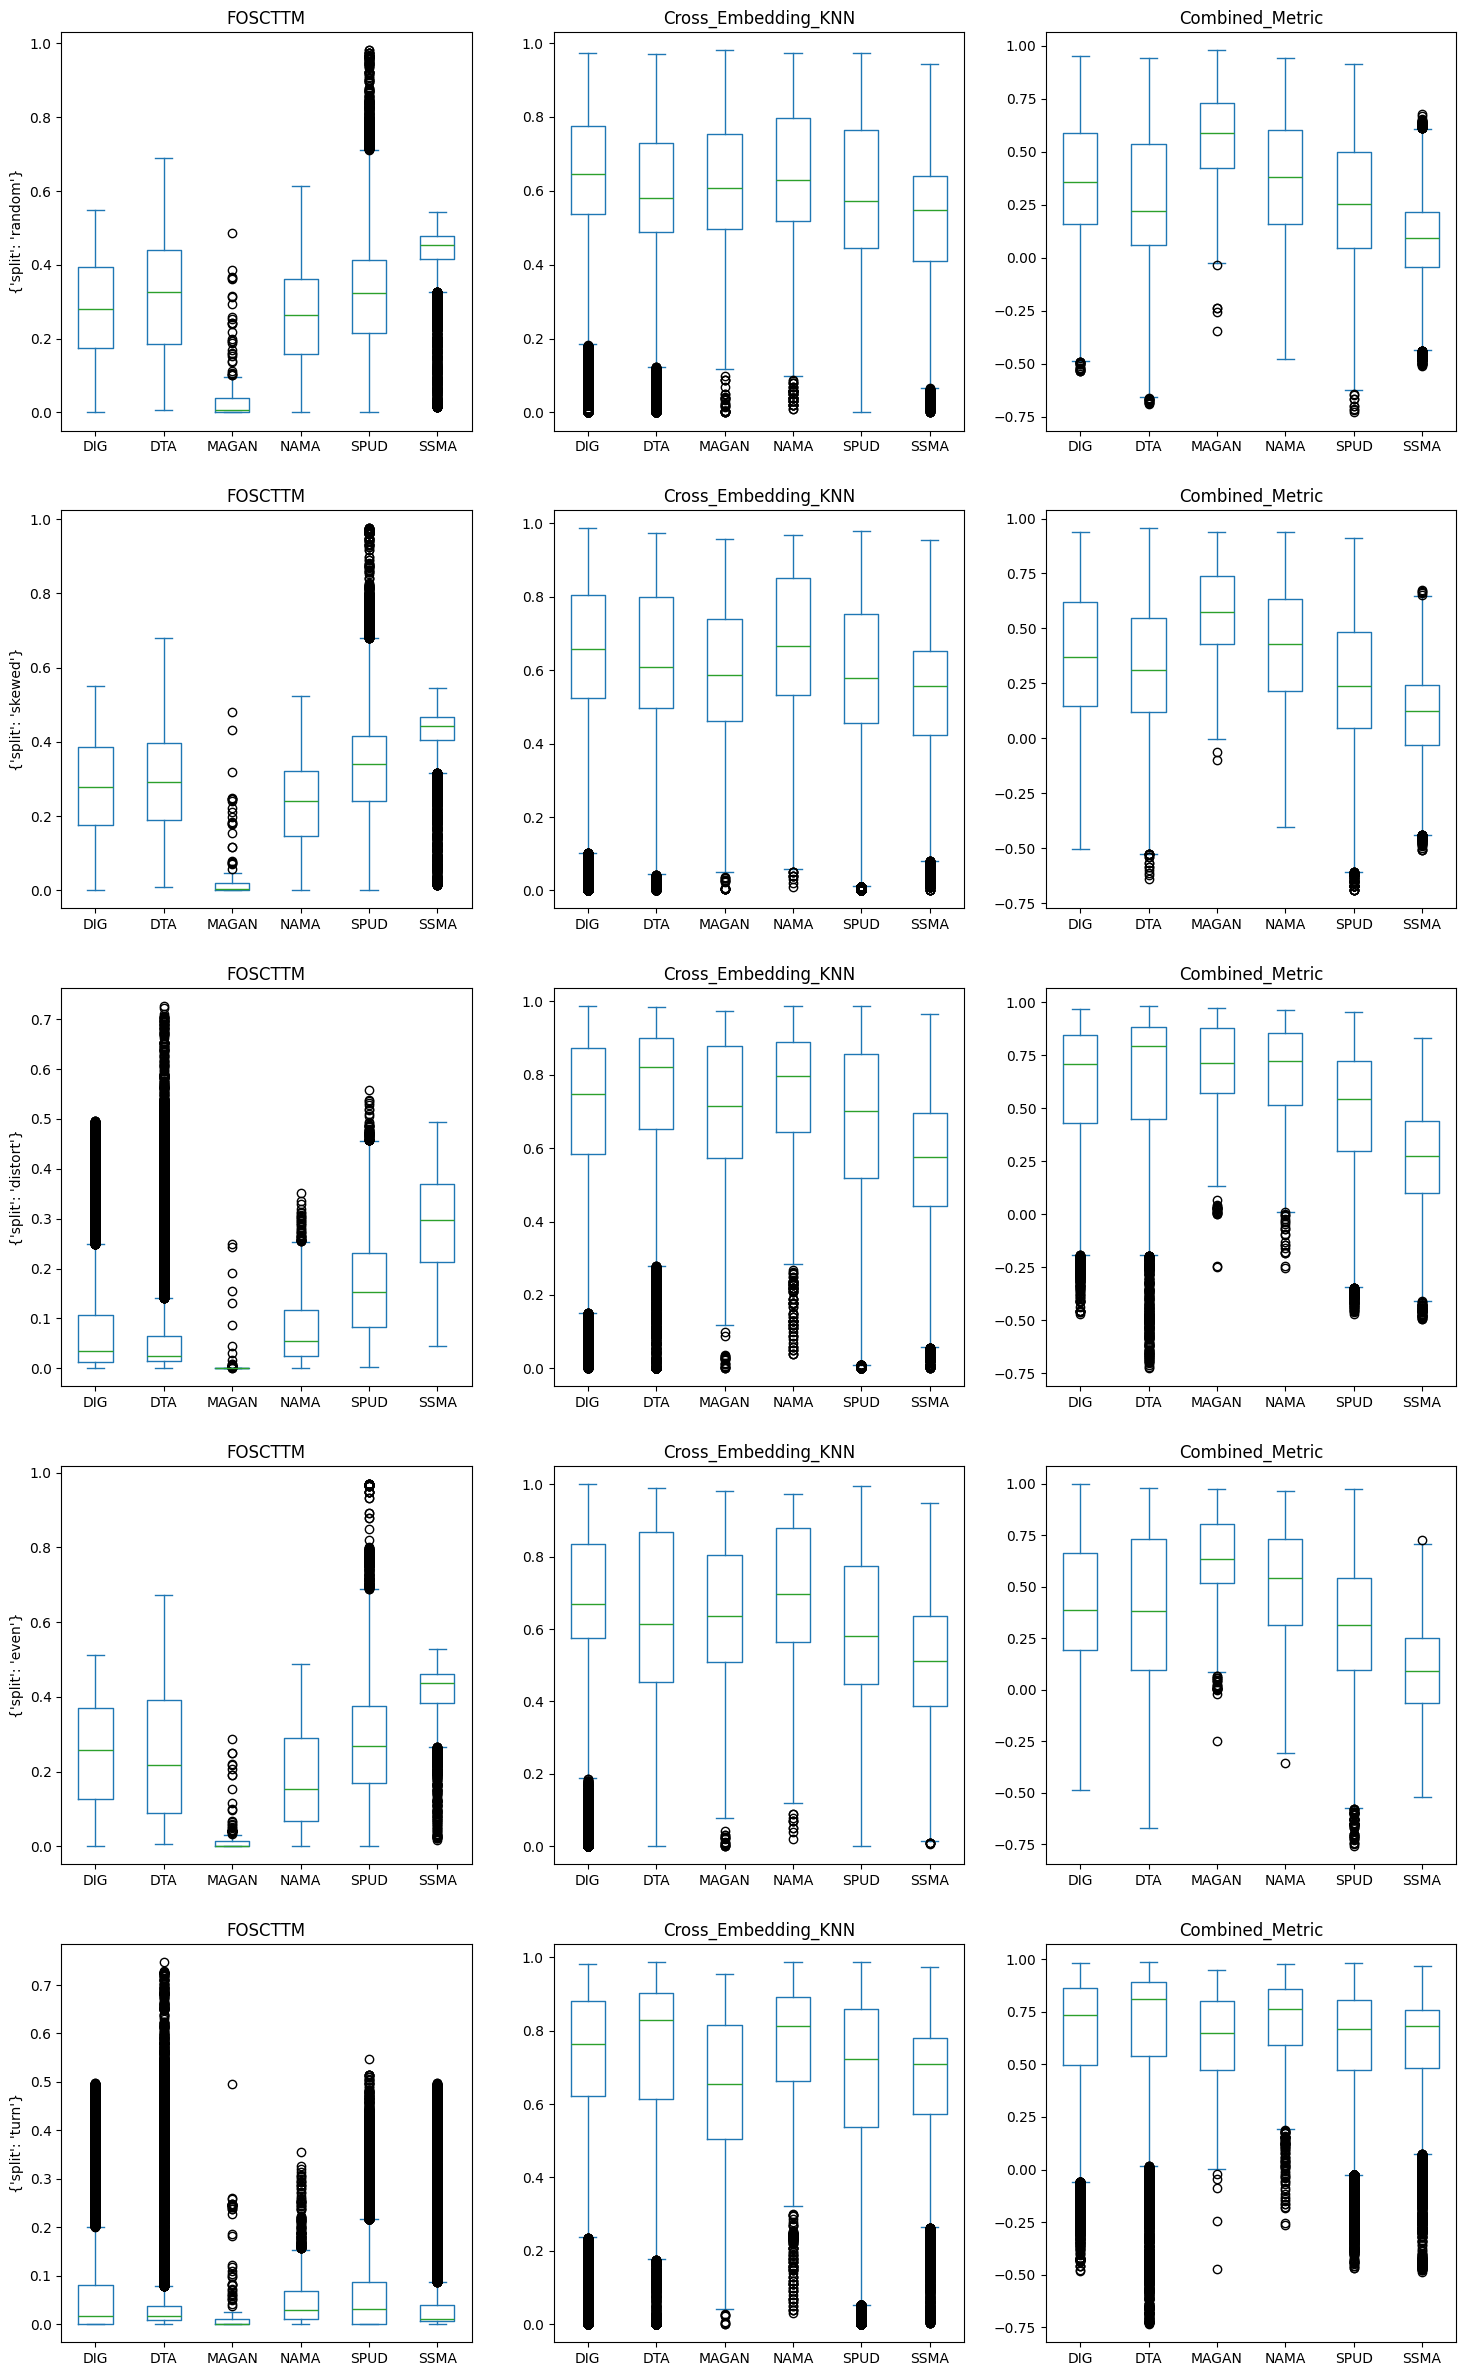

In [8]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [9]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [10]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
612835,Medicaldataset,DIG,4278,even,137.0,0.11,0.30,None,0.159123,NaN,NaN,0.358077,0.614860,0.256782
108123,tic-tac-toe,DIG,3346,even,82.0,0.09,0.05,off-diagonal,0.339668,NaN,NaN,0.471080,0.569937,0.098858
99521,balance_scale,DIG,8189,random,106.0,0.17,0.10,None,0.301186,NaN,NaN,0.476413,0.686400,0.209987
334553,hepatitis,DIG,2973,distort,8.0,0.05,0.30,off-diagonal,0.304951,NaN,NaN,0.009767,0.746377,0.736610
263686,hill_valley,DIG,1825,turn,2.0,0.01,0.50,full,0.419723,NaN,NaN,0.000708,0.671617,0.670909


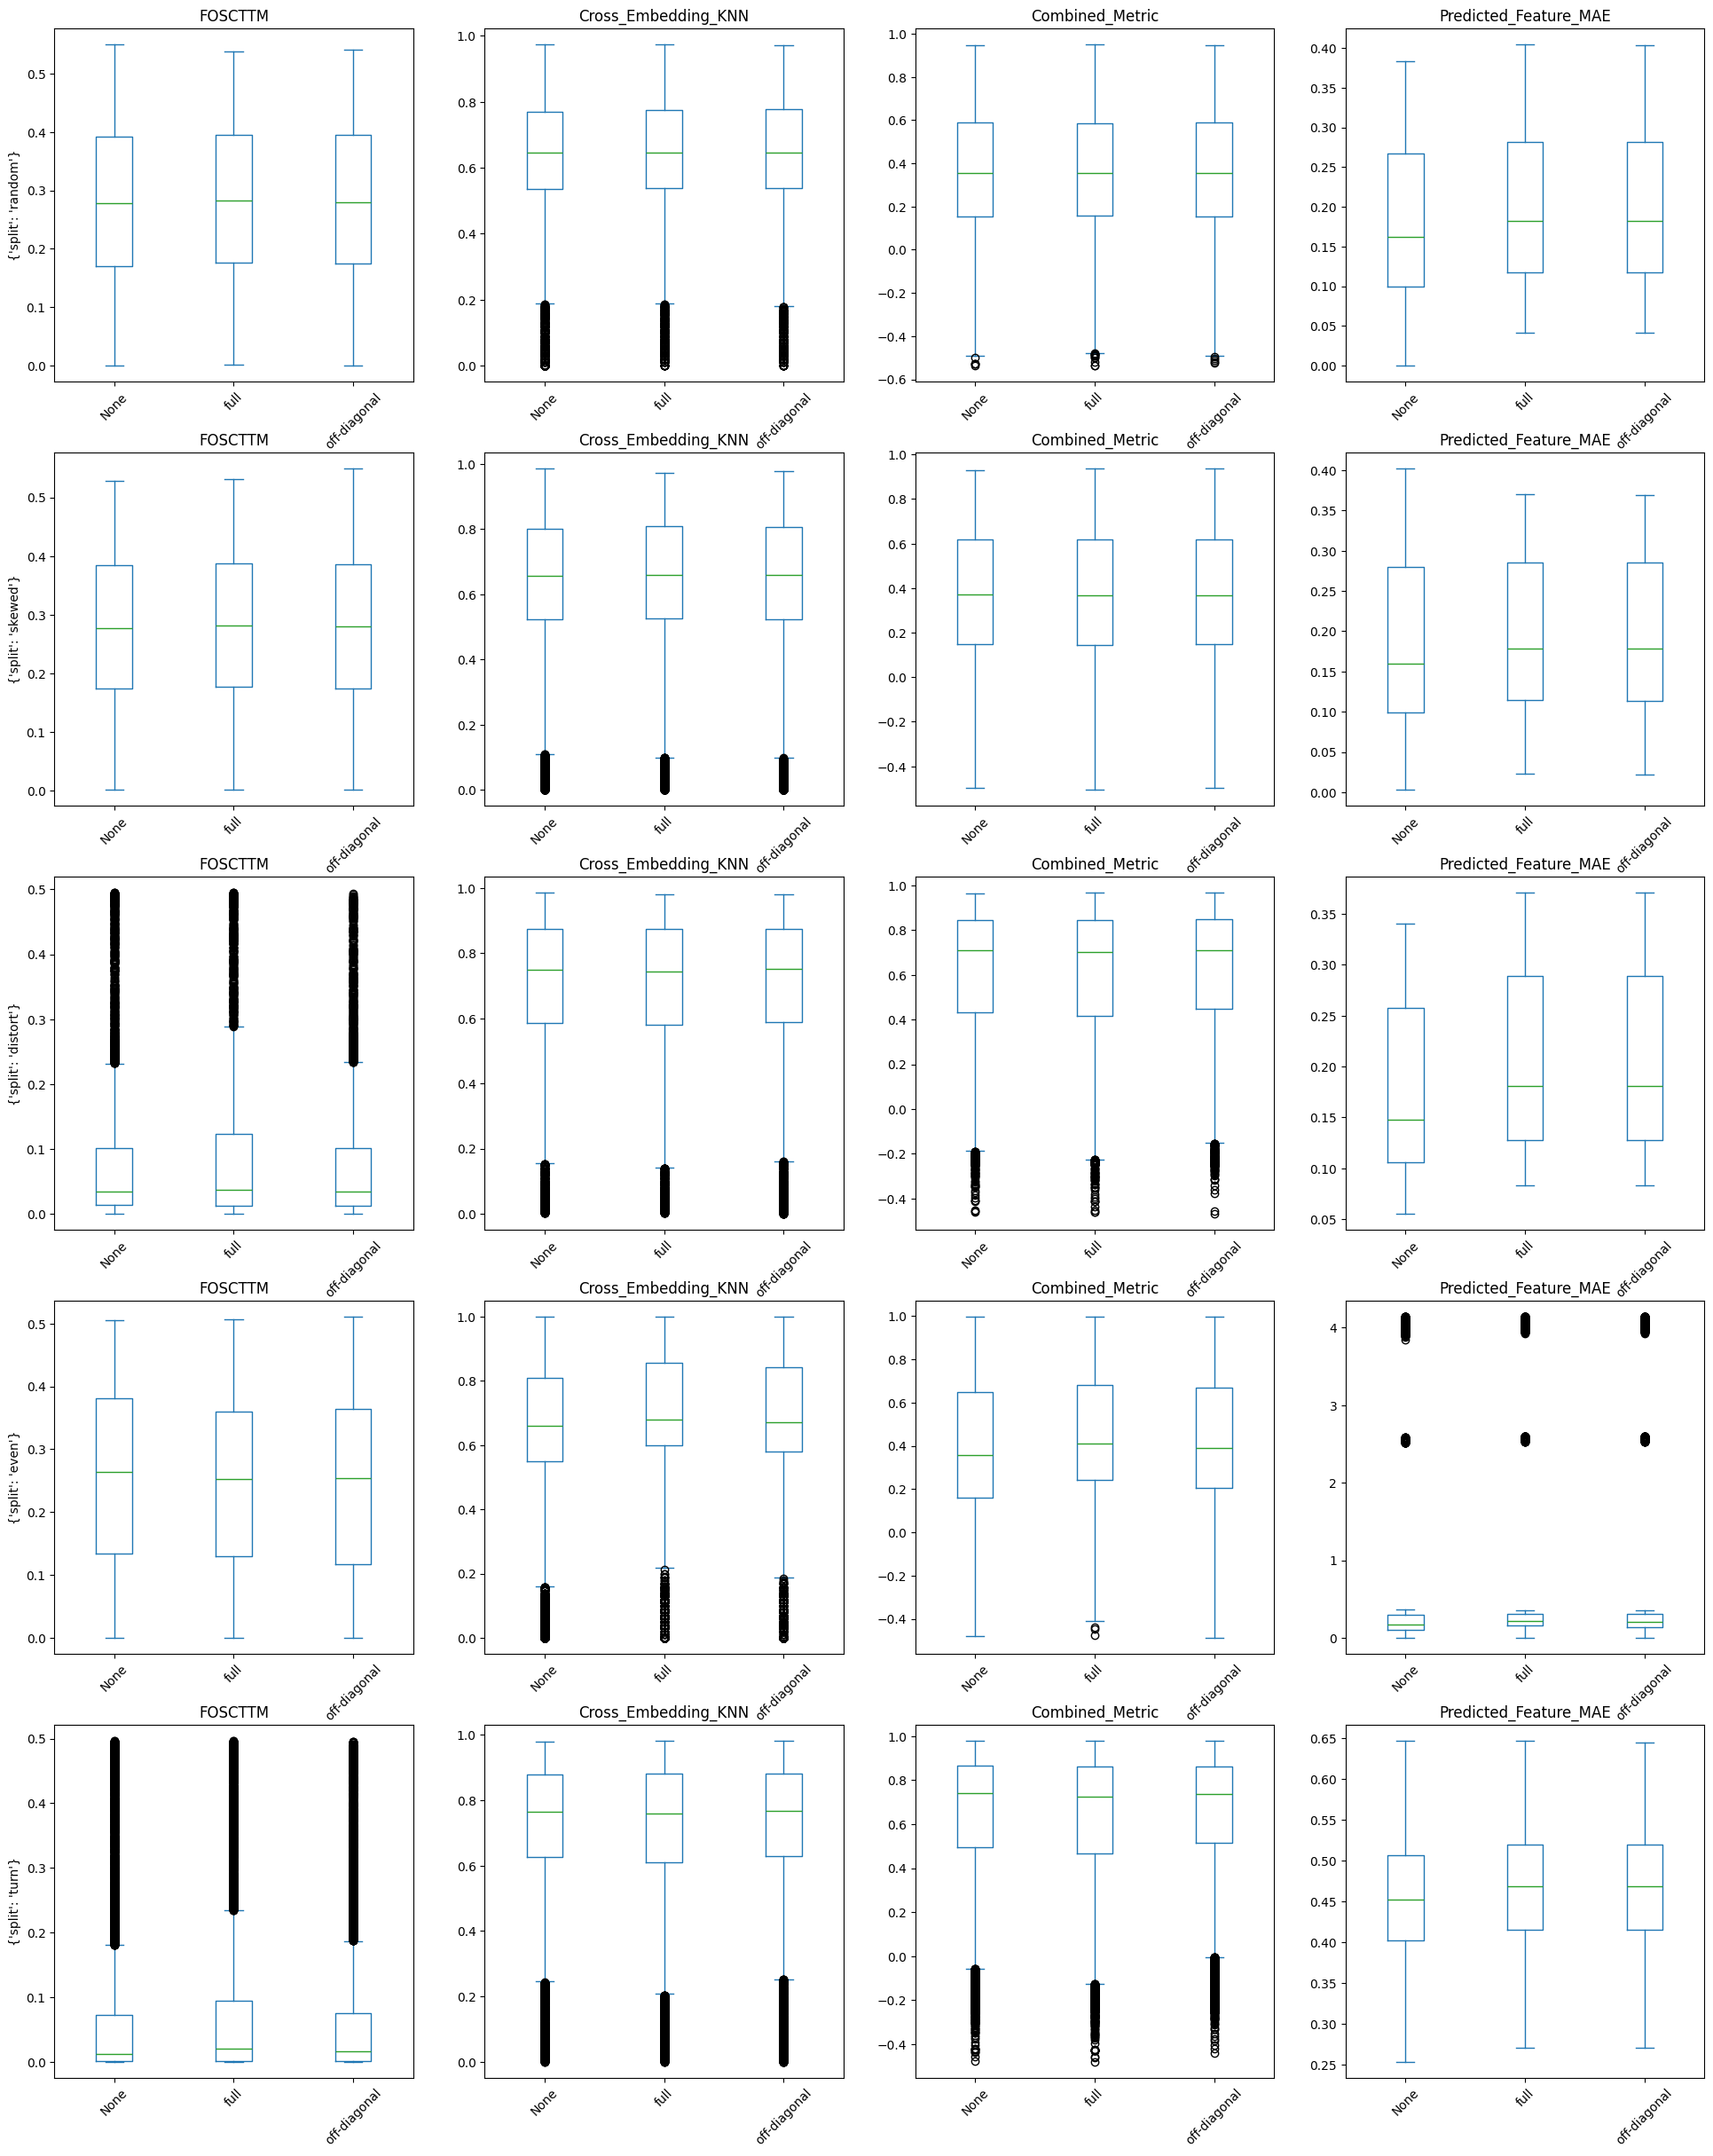

In [11]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

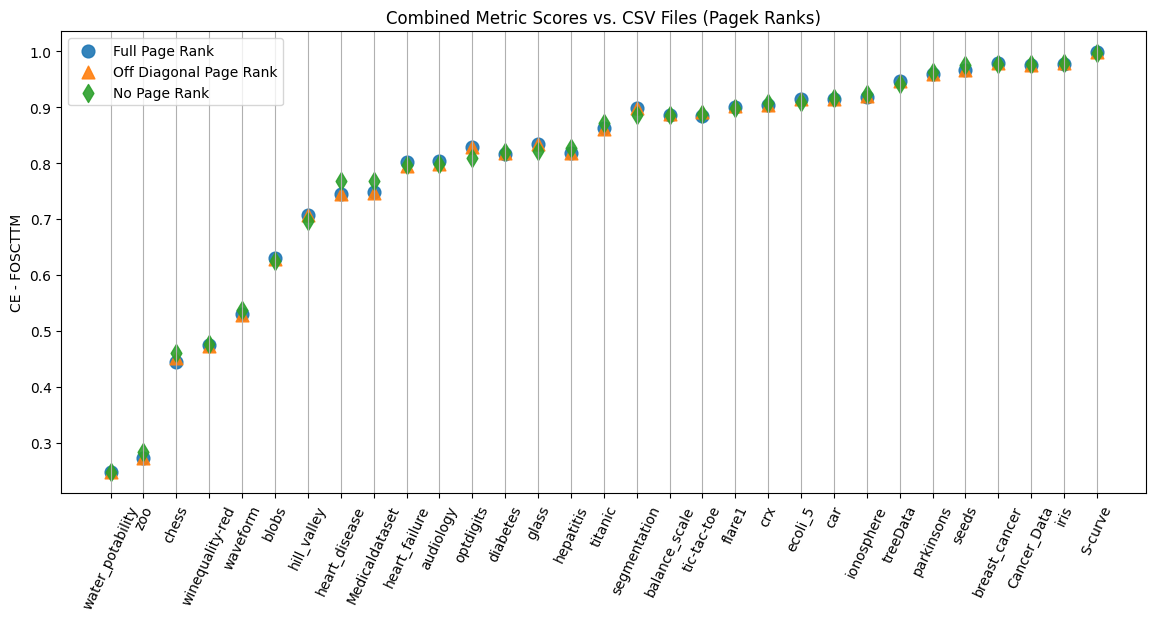

In [12]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

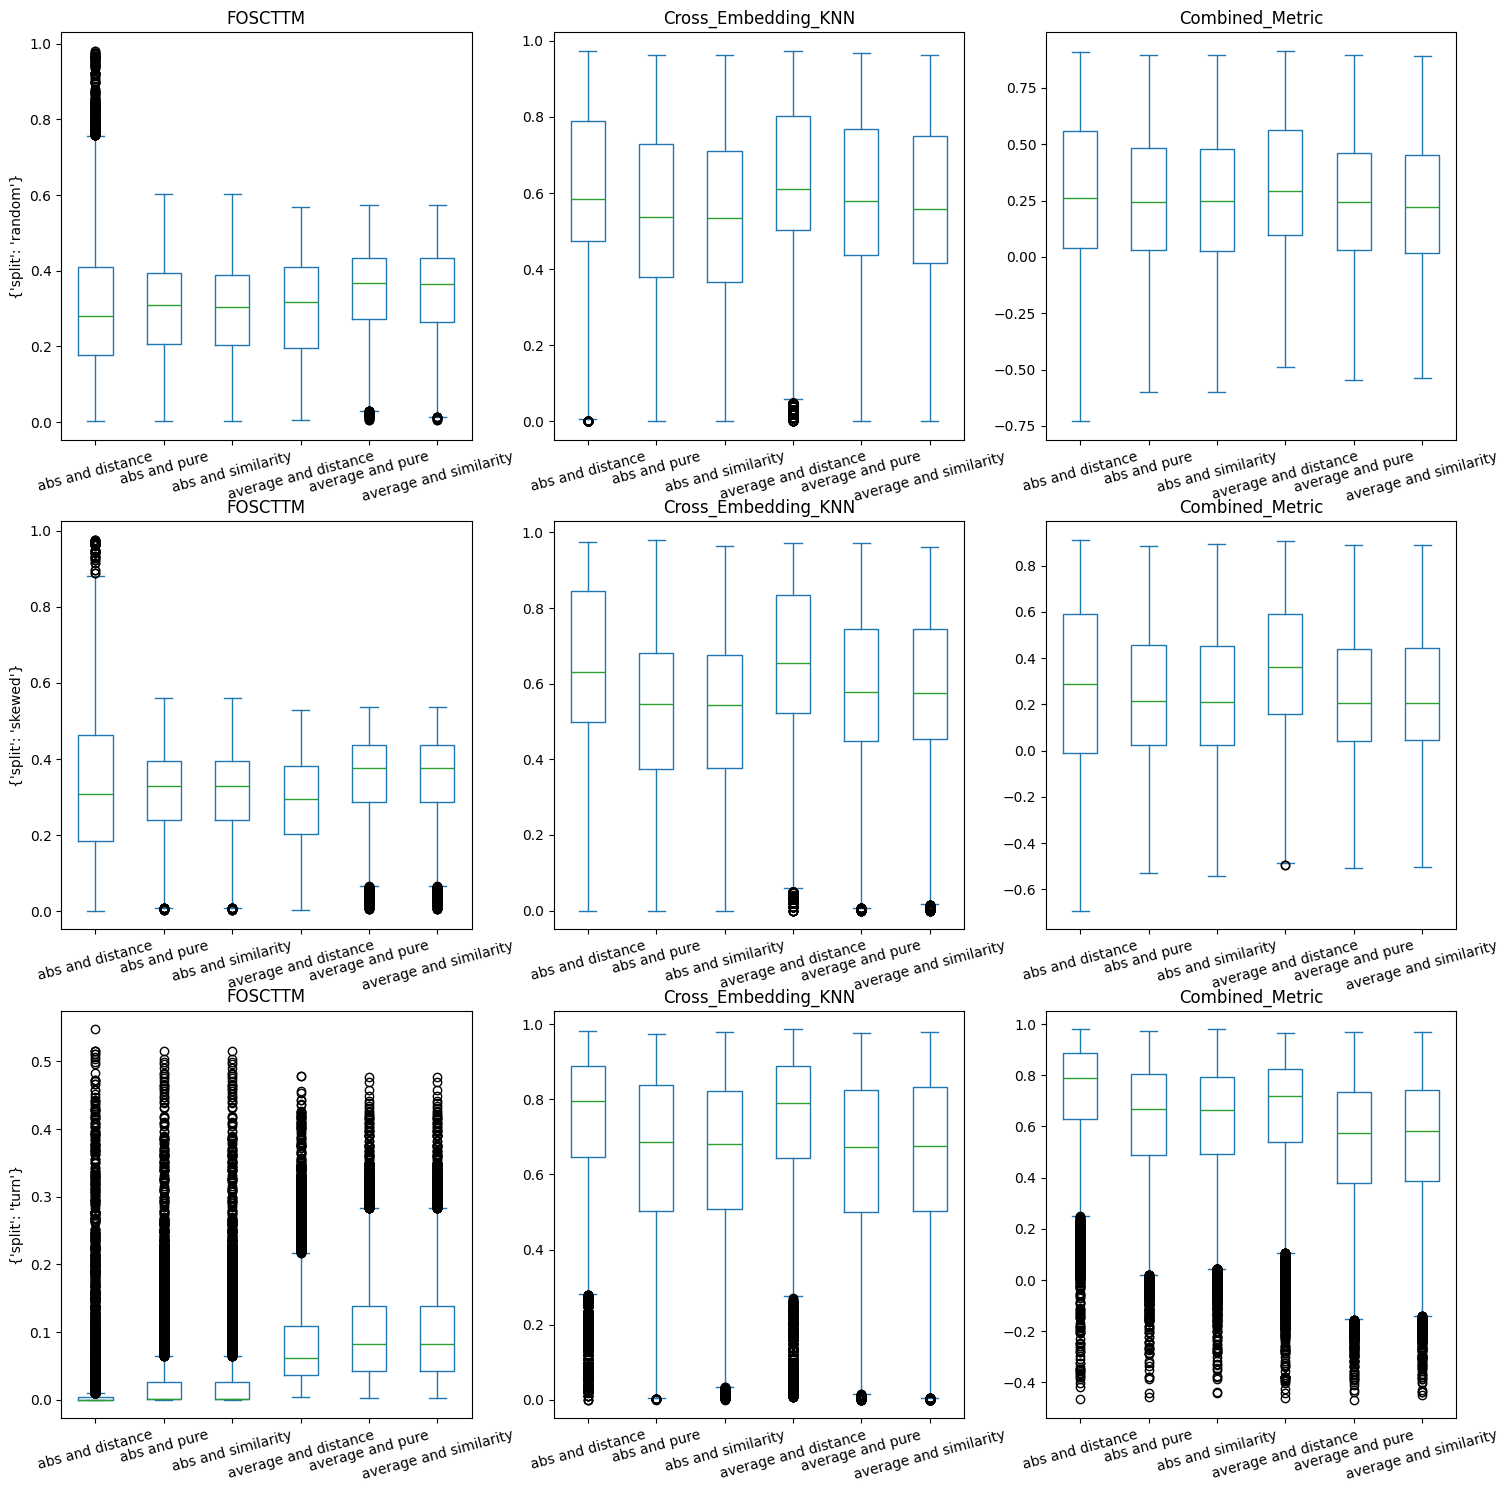

In [13]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [14]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].max(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")["Combined_Metric"].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 84,
                "alpha" : .90}

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    ax = plt.scatter(y = agregate_df["MAGAN"], marker = '>', color = "black", label = "MAGAN", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MAX)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

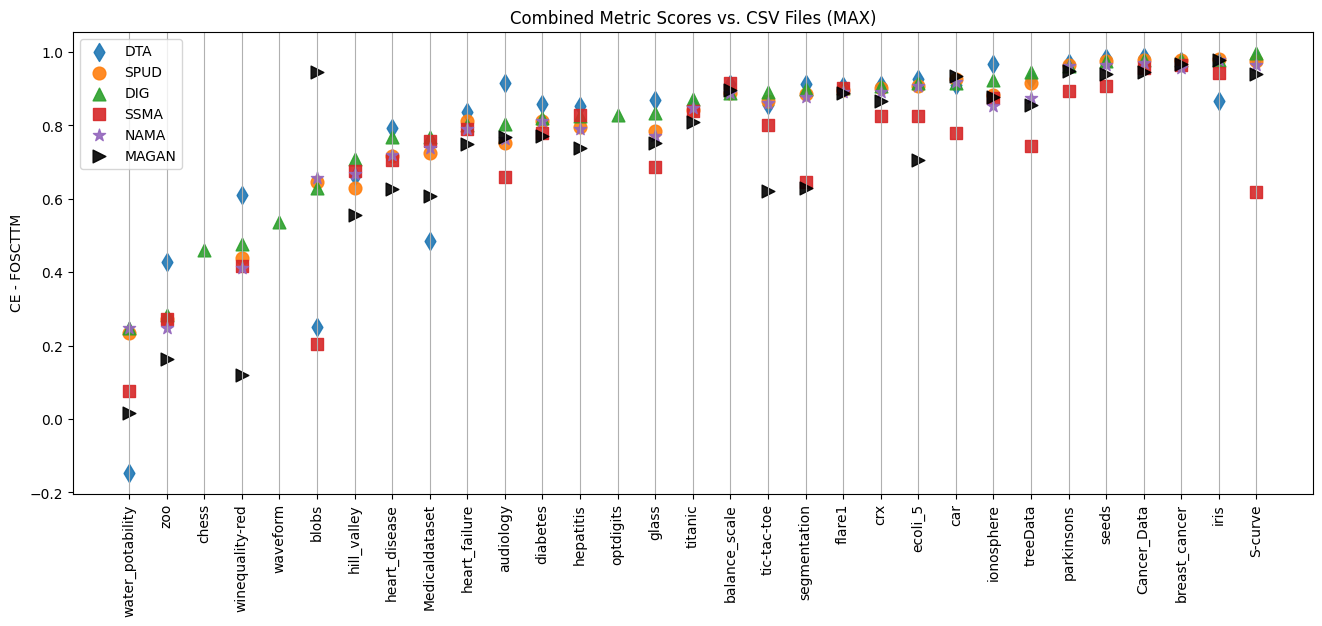

In [15]:
plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
#plt_methods_by_CSV_max(df = subset_df(df, split = "turn"), sort_by="DIG")

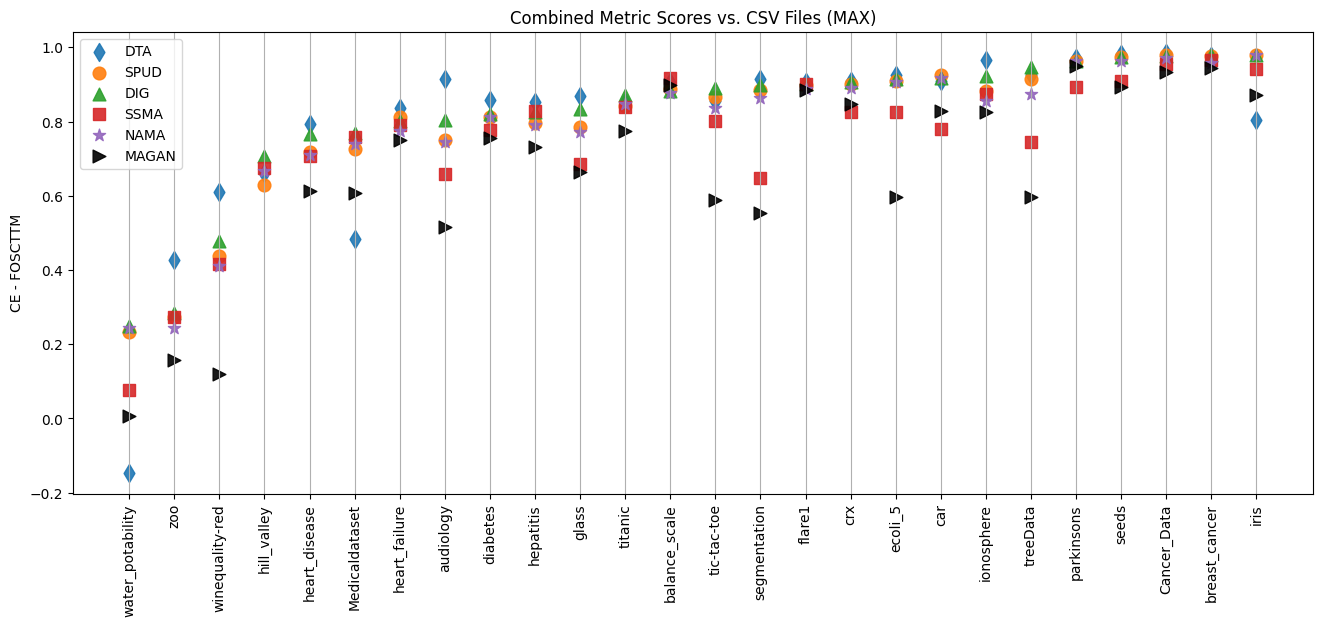

In [45]:
plt_methods_by_CSV_max(df = subset_df(df, split = "turn"), sort_by="DIG")

In [17]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")["Combined_Metric"].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].std() *2,
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")["Combined_Metric"].std() *2,
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].std() *2 ,
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].std()*2,
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].std()*2,
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].std()*2
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = "d", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = "o", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '^', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = 's', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '*', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '>', color = "black", label = "SSMA", **key_words)


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MEAN)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

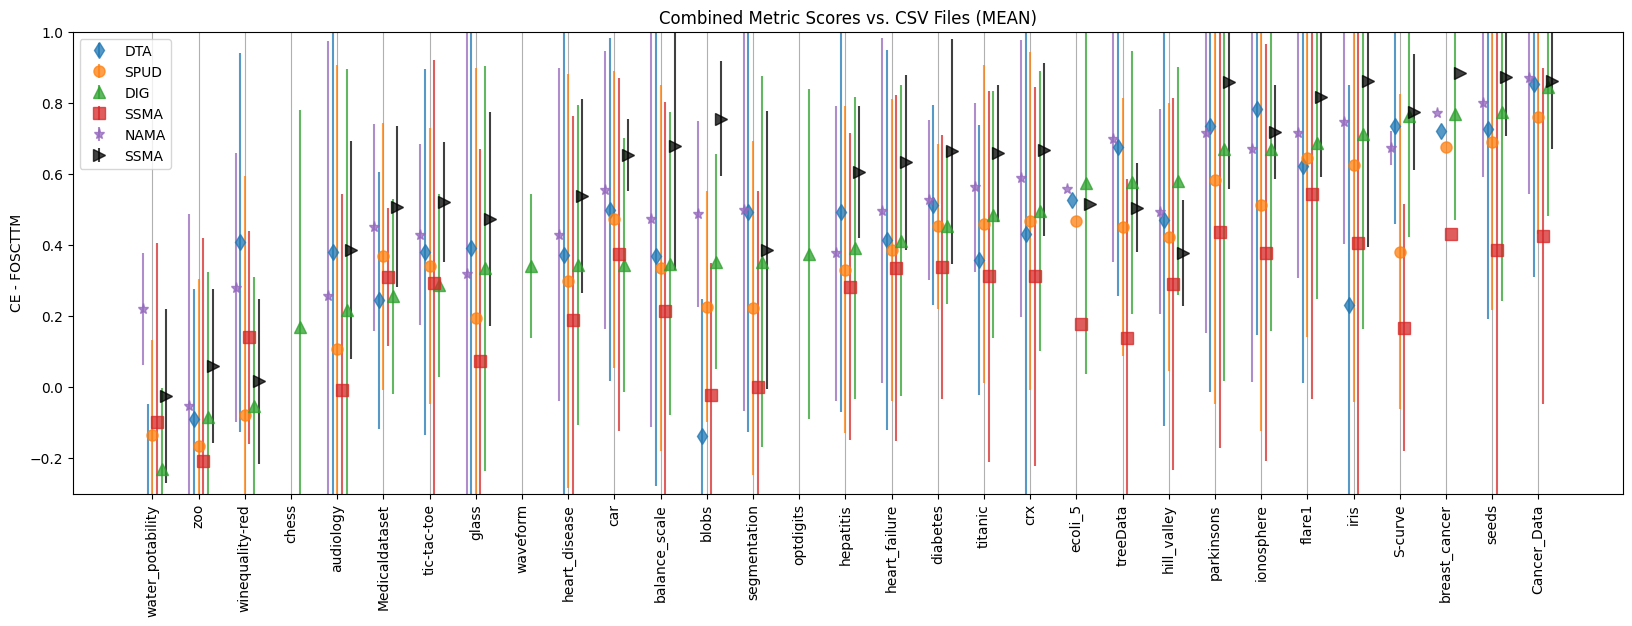

In [43]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "turn"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [19]:
def get_ranks(split = 'No'):
    #Sort by Split
    if split != "No":
        split_df = subset_df(df=df, split = split)
    else:
        split_df = df

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    df_ranked = csv_df.drop(columns= ["csv_file"]).rank(ascending=False, method='max', axis = 1)


    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
    print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts().sort_values(ascending=False)}")

In [20]:
get_ranks()

Ranked across No Split
-----------------------
DIG      2.064516
DTA      2.250000
SPUD     3.142857
NAMA     3.892857
SSMA     4.642857
MAGAN    4.928571
dtype: float64

 
STD of Ranks across No Split
----------------------------
SPUD     0.970463
DIG      1.030711
NAMA     1.165532
MAGAN    1.438326
SSMA     1.471061
DTA      1.818119
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA      16
DIG      10
MAGAN     2
NAMA      1
SSMA      1
SPUD      1
Name: count, dtype: int64


In [21]:
get_ranks(split = "random")

Ranked across random Split
-----------------------
MAGAN    1.923077
DIG      2.296296
NAMA     3.166667
SPUD     3.208333
DTA      4.333333
SSMA     5.833333
dtype: float64

 
STD of Ranks across random Split
----------------------------
SSMA     0.637022
DTA      1.049500
DIG      1.067521
SPUD     1.215092
NAMA     1.340560
MAGAN    1.494606
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
MAGAN    16
DIG       9
NAMA      3
SPUD      1
Name: count, dtype: int64


In [22]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
MAGAN    1.888889
DIG      2.071429
NAMA     2.722222
DTA      3.722222
SPUD     4.111111
SSMA     5.722222
dtype: float64

 
STD of Ranks across even Split
----------------------------
SSMA     0.751904
SPUD     0.758395
DIG      0.857584
NAMA     1.178511
DTA      1.447332
MAGAN    1.527525
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
MAGAN    18
DIG       7
NAMA      2
DTA       1
Name: count, dtype: int64


In [23]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
MAGAN    2.038462
DIG      2.192308
NAMA     2.904762
SPUD     3.692308
DTA      3.952381
SSMA     5.761905
dtype: float64

 
STD of Ranks across skewed Split
----------------------------
SSMA     0.700340
DIG      0.980581
SPUD     1.192283
DTA      1.283596
NAMA     1.338087
MAGAN    1.455494
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
MAGAN    15
DIG       7
NAMA      2
SPUD      1
DTA       1
Name: count, dtype: int64


In [24]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
DTA      1.884615
DIG      2.807692
NAMA     2.884615
SPUD     3.538462
MAGAN    3.961538
SSMA     5.923077
dtype: float64

 
STD of Ranks across distort Split
----------------------------
SSMA     0.271746
SPUD     0.947872
DIG      1.059027
NAMA     1.142871
MAGAN    1.535728
DTA      1.583084
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA      18
NAMA      3
MAGAN     3
DIG       2
Name: count, dtype: int64


In [25]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
DTA      2.076923
DIG      2.076923
SPUD     3.000000
NAMA     4.000000
SSMA     4.230769
MAGAN    5.640000
dtype: float64

 
STD of Ranks across turn Split
----------------------------
MAGAN    0.700000
DIG      0.934797
NAMA     0.979796
SPUD     0.979796
SSMA     1.335895
DTA      1.718676
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     16
DIG      7
SPUD     2
SSMA     1
Name: count, dtype: int64


## Comparing Percent of anchors and KNN values

In [26]:
def line_plot_methods(argument = "Percent_of_Anchors", **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")
    plt.axhline(df_subset[df_subset["method"] == "MAGAN"]["Combined_Metric"].mean(), label = "MAGAN", color = "black")


    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")

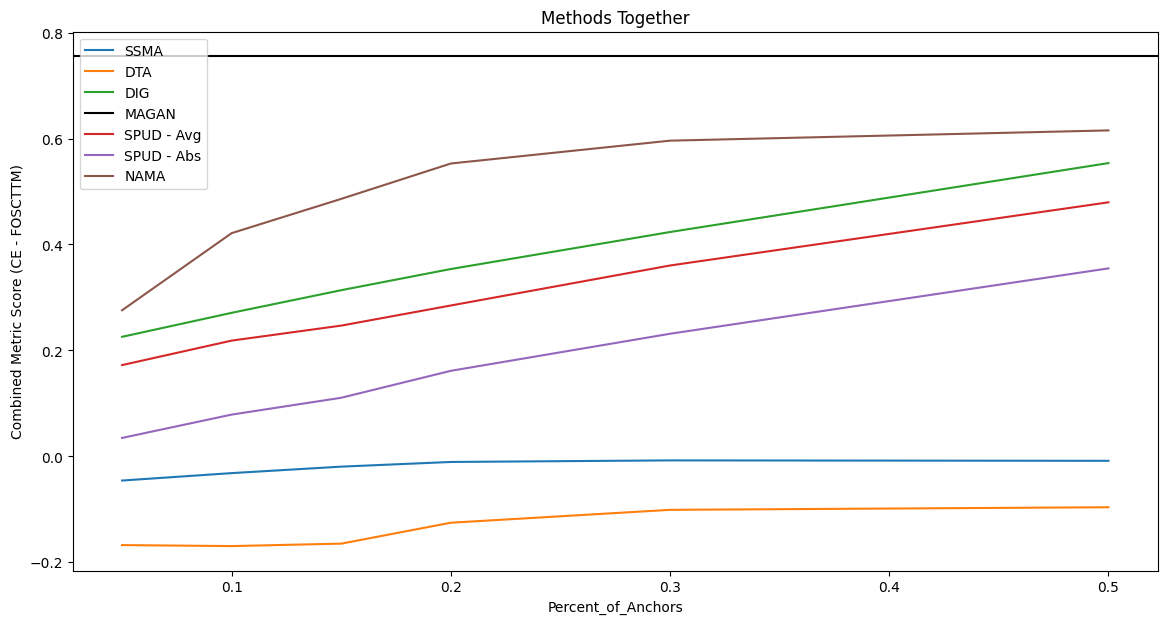

In [27]:
line_plot_methods(csv_file = "blobs", split = "even")

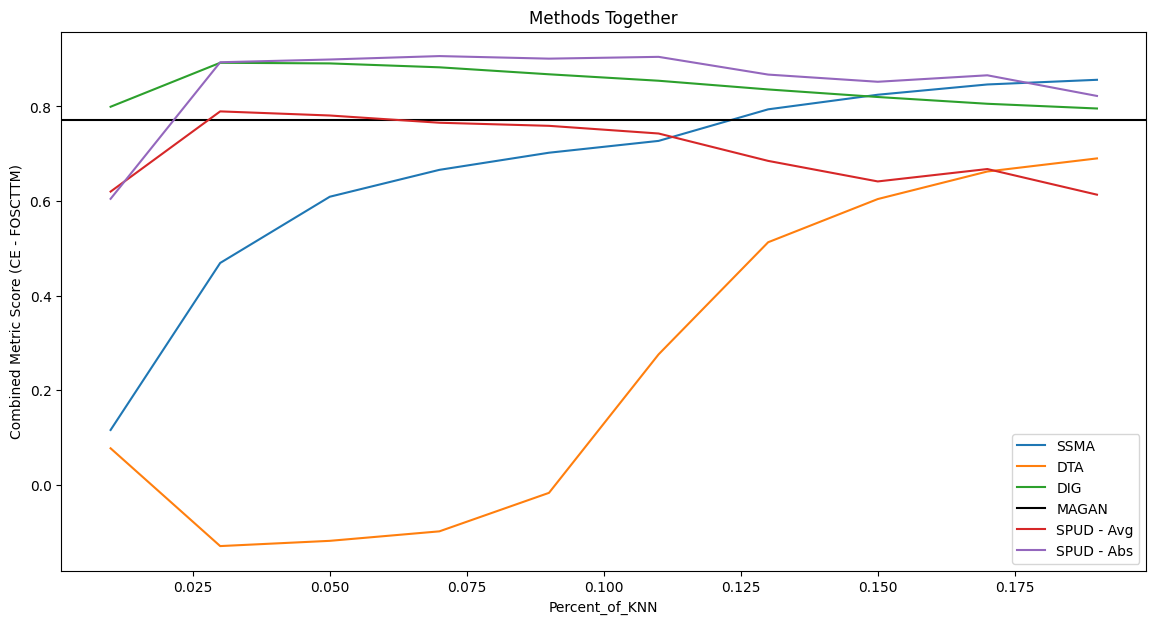

In [36]:
line_plot_methods(argument = "Percent_of_KNN", split = "turn", csv_file = "iris")

## Plotting the Embeddings

In [5]:
visual_test = tma.test_manifold_algorithms(csv_file="iris.csv", split= "skewed", percent_of_anchors= [0.05], verbose=2)


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


Percent of anchors used: 0.05
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


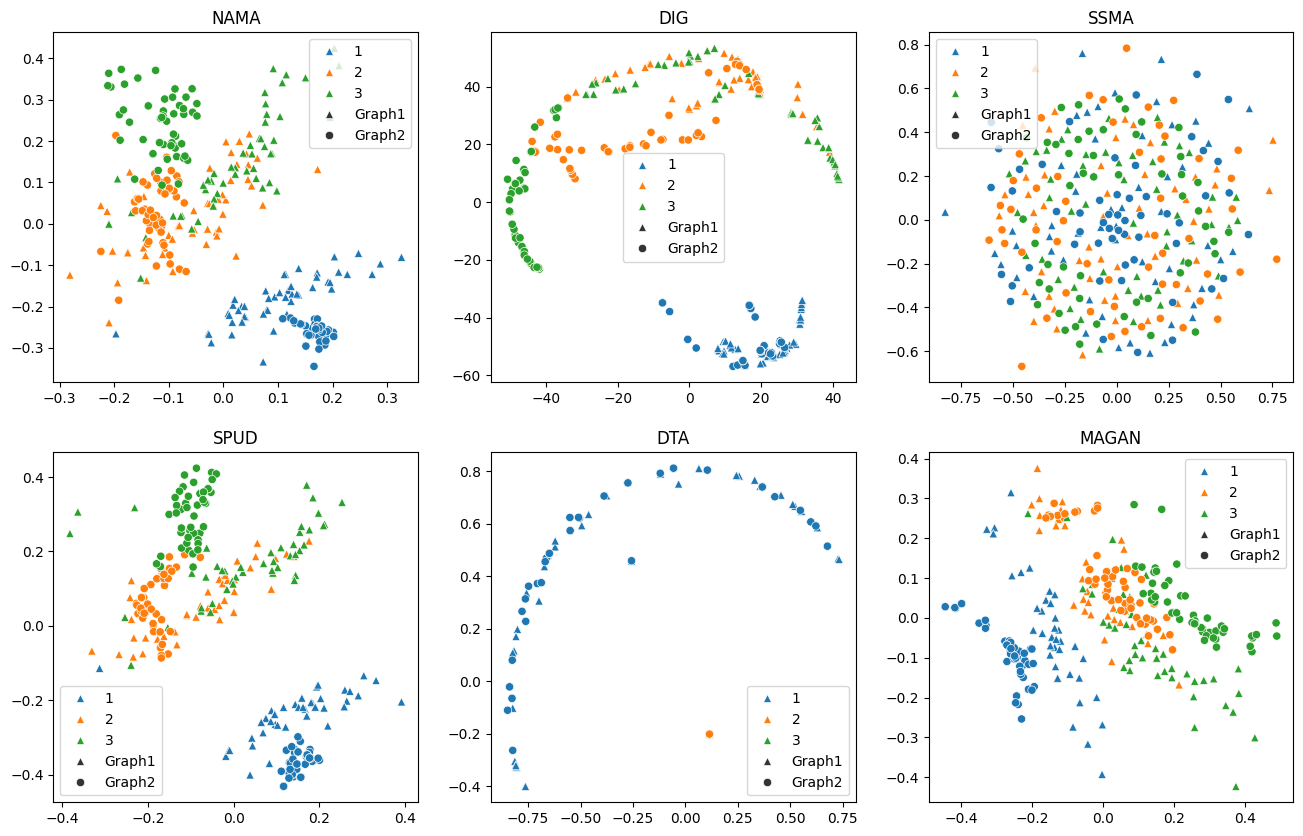

In [6]:
visual_test.plot_embeddings(knn = 5)

# Time Comparisions Below

In [79]:
pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True).T


,0,1,2,3,4,5
Methods,DIG,SPUD,SSMA,DTA,NAMA,MAGAN
zoo.csv,2.051146,1.979575,1.159722,1.541715,2.732113,36.202
hepatitis.csv,3.673588,3.642993,4.248523,3.795742,4.872489,60.454023
iris.csv,3.401358,3.596051,4.294494,4.622846,6.227232,72.027937
seeds.csv,6.336899,5.099518,11.139338,11.307132,10.448334,56.742175
S-curve,5.553548,5.512881,9.941261,9.567897,14.486528,108.382251
parkinsons.csv,6.721155,6.064839,8.124955,9.272984,16.270395,63.486195
audiology.csv,6.11107,6.817885,6.804995,9.17517,14.216228,66.887187
glass.csv,5.886319,8.767957,14.13043,11.141553,19.214126,61.843572
segmentation.csv,7.850724,8.601908,12.805081,11.840308,15.465682,42.748242


In [84]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df)

    #Count Instances
    instance_dict[csv_file] = len(df.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df) * len(df.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

,Methods,zoo.csv,hepatitis.csv,iris.csv,audiology.csv,parkinsons.csv,seeds.csv,segmentation.csv,glass.csv,heart_disease.csv,heart_failure.csv,blobs,flare1.csv,ecoli_5.csv,ionosphere.csv,S-curve
0,DIG,2.051146,3.673588,3.401358,6.11107,6.721155,6.336899,7.850724,5.886319,21.008766,21.812685,15.192974,28.335809,24.406317,28.372385,5.553548
1,SPUD,1.979575,3.642993,3.596051,6.817885,6.064839,5.099518,8.601908,8.767957,16.608557,13.288621,9.765458,18.851015,17.090616,29.439159,5.512881
2,SSMA,1.159722,4.248523,4.294494,6.804995,8.124955,11.139338,12.805081,14.13043,28.532746,26.902836,18.21141,34.168887,36.207325,37.064981,9.941261
3,DTA,1.541715,3.795742,4.622846,9.17517,9.272984,11.307132,11.840308,11.141553,35.958692,26.993513,12.08029,36.895523,35.821655,48.621302,9.567897
4,NAMA,2.732113,4.872489,6.227232,14.216228,16.270395,10.448334,15.465682,19.214126,45.309474,39.073721,35.610122,54.300962,49.365353,81.47374,14.486528
5,MAGAN,36.202,60.454023,72.027937,66.887187,63.486195,56.742175,42.748242,61.843572,41.687702,36.722285,71.533992,47.254911,41.984042,51.612677,108.382251
6,0,101.0,138.0,150.0,190.0,195.0,199.0,211.0,214.0,297.0,299.0,300.0,323.0,327.0,351.0,600.0
7,Feature Count,18.0,16.0,5.0,68.0,23.0,8.0,20.0,10.0,14.0,11.0,2.0,11.0,8.0,35.0,3.0
8,Complexity,1818.0,2208.0,750.0,12920.0,4485.0,1592.0,4220.0,2140.0,4158.0,3289.0,600.0,3553.0,2616.0,12285.0,1800.0
